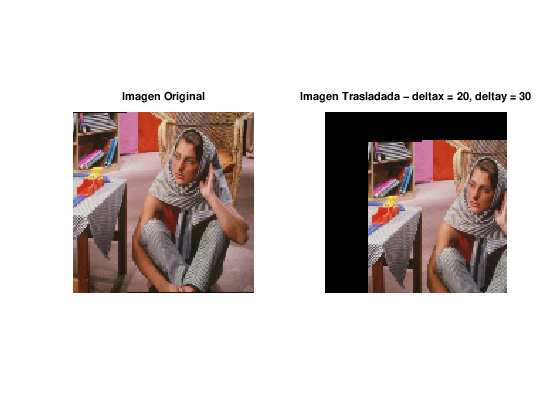

In [2]:
pkg load image

A = imread('images/barbara.jpg');
A = imresize(A, [128 128]);
subplot(1,2,1)
imshow(A)
title('Imagen Original')


deltax = 20;
deltay = 30;
[m,n,r] = size(A);

B=uint8(zeros(m,n,r));


for x = 1:m
    for y = 1:n
    
        x_t=x+deltax;
        y_t=y+deltay;
        if and(x_t<=m,y_t<=n)
            B(x_t,y_t,:) = A(x,y,:);
        end
    end
end

subplot(1,2,2)
imshow(B)
title('Imagen Trasladada - deltax = 20, deltay = 30')

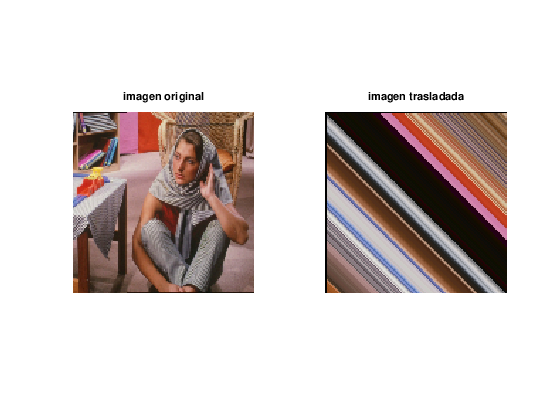

In [4]:
pkg load image

A = imread("images/barbara.jpg");
A = imresize(A,[128 128]);
subplot(1,2,1)
imshow(A)
title("imagen original")

%Traslacion Delta X y Delta Y de la imagen
deltax = 20; deltay = 30;

[m,n,r] = size(A);
B = uint8(zeros(m,n,r));

for i=1:min([m n])
    deltax = i; deltay = i;
    for x=1:m
        for y=1:n
            x_t = x+deltax; y_t = y+deltay; %Transformacion afin
            if and(x_t<=m ,y_t<=n)
                B(x_t,y_t,:) = A(x,y,:); %Ubicacion del pixel A(x,y) en la nueva imagen B(x,y)
            end
        end
    end


    subplot(1,2,2)
    imshow(B)
    title("imagen trasladada")
    pause(0.1);
end

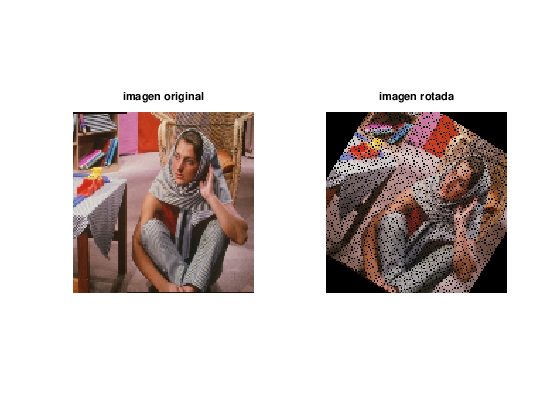

In [34]:
pkg load image

A = imread("images/barbara.jpg");
A = imresize(A,[128 128]);
subplot(1,2,1)
imshow(A)
title("imagen original")

[m,n,r] = size(A);
B = uint8(zeros(m,n,r));
angulo = 32;
a0 = cosd(angulo); a1 = sind(angulo);
b0 = -sind(angulo); b1 = cosd(angulo);
xc = floor(m/2); yc = floor(n/2); %Calculando el centro

for x=1:m
    for y=1:n
        x_t = mod(round(a0*(x-xc)+a1*(y-yc)+xc),m); %valor entre 0 y m-1 Modulo m redondeado
        y_t = mod(round(b0*(x-xc)+b1*(y-yc)+yc),n); %valor entre 0 y n-1 Modulo n redondeado
        x_aux = round(a0*(x-xc)+a1*(y-yc)+xc); %valor entre 0 y m-1 redondeado
        y_aux = round(b0*(x-xc)+b1*(y-yc)+yc); %valor entre 0 y n-1 redondeado
        if and(x_t == x_aux , y_t == y_aux)
            B(x_t+1,y_t+1,:) = A(x,y,:);%Se suma 1 porque la indexacion comienza en 1
        end
    end
end


subplot(1,2,2)
imshow(B)
title("imagen rotada")


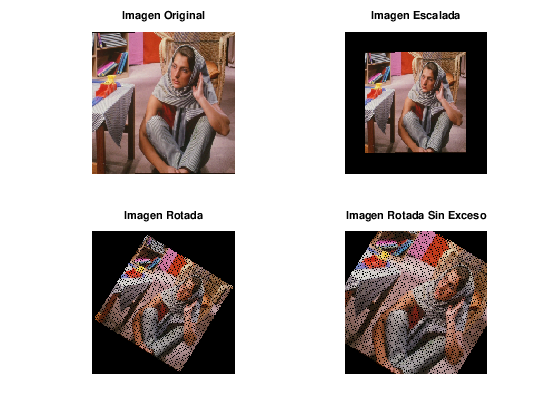

In [6]:
pkg load image

A = imread('images/barbara.jpg');
A = imresize(A, [128 128]);
subplot(2,2,1)
imshow(A)
title('Imagen Original')

[m,n,r] = size(A);
A_aux = uint8(zeros(floor(sqrt(m*m+n*n)),floor(sqrt(m*m+n*n)),r)); %matriz cuadrada con tamaño igual a la hipotenusa
[m_aux,n_aux,r] = size(A_aux);
B = uint8(zeros(m_aux,n_aux,r)); %matriz para imagen rotada
B_r = uint8(zeros(m,n,r));% matriz para imagen recortada
xc = floor(m/2);
yc = floor(n/2);
xc_aux = floor(m_aux/2);
yc_aux = floor(n_aux/2);
deltax = xc_aux-xc;
deltay = yc_aux-yc;

%traslacion

for x = 1:m
    for y = 1:n
        x_t=x+deltax;
        y_t=y+deltay;
        A_aux(x_t,y_t,:) = A(x,y,:);
    end
end
subplot(2,2,2)
imshow(A_aux)
title('Imagen Escalada')

%rotacion

angulo = 32;
a0 = cosd(angulo);
a1 = sind(angulo);
b0 = -sind(angulo);
b1 = cosd(angulo);

for x = 1:m_aux
    for y = 1:n_aux
        x_t = mod(round(a0*(x-xc_aux)+a1*(y-yc_aux)+xc_aux),m_aux); %modulo m redondeado
        y_t = mod(round(b0*(x-xc_aux)+b1*(y-yc_aux)+yc_aux),n_aux); %modulo n redondeado
        B(x_t+1,y_t+1,:) = A_aux(x,y,:);
    end
end

subplot(2,2,3)
imshow(B)
title('Imagen Rotada')

%recorte

for x = 1:m_aux
    for y = 1:n_aux
        x_t=x-deltax;
        y_t=y-deltay;
        if and(x_t<=m,y_t<=n,x_t>0,y_t>0)
            B_r(x_t,y_t,:) = B(x,y,:);
        end
    end
end
subplot(2,2,4)
imshow(B_r)
title('Imagen Rotada Sin Exceso')

Am =  15
L =  75


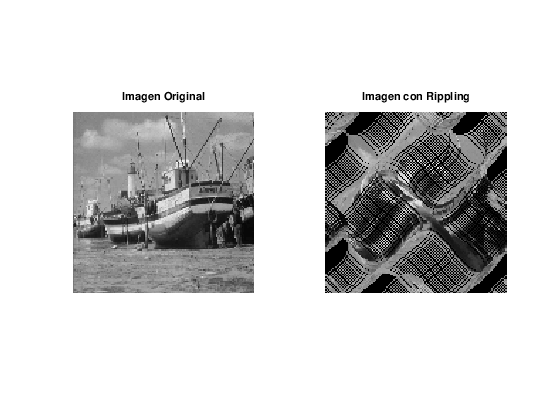

In [10]:
pkg load image


A = imread('images/boat.jpg');
A = imresize(A,[128 128]);
subplot(1,2,1)
imshow(A)
title('Imagen Original')
#A = im2double(A);
[m,n] = size(A);
B = im2uint8(zeros([m n]));
Am = 15
L = 75

for x = 1:m
    for y = 1:n
        xp = mod(round(x + Am*sin(2*pi*y/L)),m);
        yp = mod(round(y + Am*sin(2*pi*x/L)),n);
        B(xp+1,yp+1) = A(x,y);
    end
end
subplot(1,2,2)
imshow(B)
title('Imagen con Rippling')

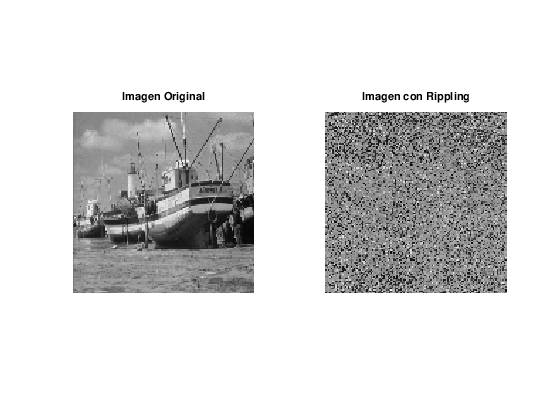

In [11]:
pkg load image

A = imread('images/boat.jpg');
A = imresize(A,[128 128]);
subplot(1,2,1)
imshow(A)
title('Imagen Original')
#A = im2double(A);
[m,n] = size(A);
B = im2uint8(zeros([m n]));
Am = 5;
L = 75;
for Am = 5:5:200
    for x = 1:m
        for y = 1:n
            xp = mod(round(x + Am*sin(2*pi*y/L)),m);
            yp = mod(round(y + Am*sin(2*pi*x/L)),n);
            B(xp+1,yp+1) = A(x,y);
        end
    end
    subplot(1,2,2)
    imshow(B)
    pause(0.1)
    title('Imagen con Rippling')
end